# AlgTest Process TPM 2.0 data visualisation

This is a test for visualisation of html outputs in jupyter notebooks

## 1. Results
First we need to get TPM 2.0 results. Upload a folder with results in the left corner. Make sure your results are zipped and zip has following file structure:

```
tpmalgtest_results - This folder must be created when extracting
│
│
└───<some_name>
    │───detail
    │   │─── docker_info.csv
    │   │─── Keygen[_:]RSA_(1024|2048).csv - Important
    │   │─── keygen_*.csv
    │   └─── Quicktest_*.csv
    │───performance
    │   └─── <tpm name>.csv -> Performance result - Important
    └───results
        └─── <tpm name>.csv -> Support result - Important

```

### a) Unzipping

In [1]:
import zipfile
# Fill in the filename
FILENAME = "tpmalgtest_results.zip"

with zipfile.ZipFile(FILENAME,"r") as zip_ref:
    zip_ref.extractall(".")

### b) Parsing results

In [2]:
import pandas as pd
import os
from algtestprocess.modules.parser.tpm.performance import PerformanceParserTPM
from algtestprocess.modules.parser.getters import get_tpm_profiles

performance_profiles, support_profiles, cryptoprops = get_tpm_profiles('./tpmalgtest_results')

### c) Utility functions

In [3]:
def choose(data: list[tuple[str, str]]):
    print("Please choose from these devices or write -1 to end")
    for idx, item in enumerate(data):
        print(f"{idx} - {item[0]}")
    
    which =  int(input())
    
    if which == -1:
        return
    
    if which < 0 or which >= len(data):
        print(f"Wrong choice, please choose correctly from range 0 - {len(data)-1} or -1 to end")
        choose(data)
        return
    
    print(f"Chosen {data[which]}")
    
    return IFrame(data[which][1], width=1400, height=900)

def validInput(prompt, items):
    while True:
        try:
            for idx, item in enumerate(items):
                print(f"{idx} - {item}")
            value = input(prompt).rstrip()
            value = int(value)
        except ValueError:
            continue
        if value == -1:
            return None

        if value < 0 or value >= len(items):
            print(f"Wrong choice, please choose correctly from range 0 - {len(names)-1} or -1 to end")
            continue
        
        return value

## 2. Visualisations of Support and Performance results

### a) Support table

In [4]:
from algtestprocess.modules.pages.support import SupportTPM
from IPython.display import IFrame, display, HTML

# Now we generate the file
# notebook argument means that the function will inline all needed js / css
# output path makes the function actually write the html into file
html, path = SupportTPM(support_profiles).run(notebook=True, output_path=".")

# We can view that file using IFrame or manually open it in browser
IFrame(path, width=1400, height=900)

### b) Similarity table

In [5]:
from algtestprocess.modules.pages.similarity import SimilarityTPM

html, path = SimilarityTPM(performance_profiles).run(notebook=True, output_path=".")

IFrame(path, width=1400, height=900)

### c) Radar graphs

In [8]:
from algtestprocess.modules.pages.radar import RadarTPM

# For visualisations which create multiple htmls return list of tuples (name, path)
_, data = RadarTPM(performance_profiles).run(notebook=True, output_path=".")

# Uncomment to visualise radar graphs for TPMs
choose(data)

Please choose from these devices or write -1 to end
0 - INTC Intel 2.0.2.2092
1 - INTC Intel 11.6.10.1196
2 - INTC Intel 11.5.0.1058
3 - NTC NPCT75x$rls 7.2.1.0
4 - IFX SLB9670 7.62.12.13824
5 - STM  1.258.0.0
6 - INTC Intel 303.12.0.0
7 - INTC Intel 10.0.60.3000
8 - INTC Intel 401.1.0.0
9 - IFX SLB9670 7.63.13.6400
10 - IFX SLB9670 7.63.13.6400
11 - IFX SLB9670 7.63.13.6400
12 - INTC Intel 11.5.0.1058
13 - INTC Intel 11.6.10.1196
14 - STM  1.258.0.0
15 - STM  73.4.17568.4452
16 - INTC Intel 302.12.0.0
17 - INTC Intel 401.1.0.0
18 - STM  73.4.17568.4452
19 - INTC Intel 2.0.4.3098
20 - INTC Intel 11.8.50.3425
21 - STM  73.4.17568.4452
22 - STM  73.64.17568.6659
23 - STM  73.4.17568.4452
24 - INTC Intel 2.0.4.3098
25 - INTC Intel 2.0.2.2092
26 - INTC Intel 403.1.0.0
27 - INTC Intel 402.1.0.0
28 - INTC Intel 302.12.0.0
29 - IFX SLB9670 FIPS 7.83.13.7680
30 - NTC rlsNPCT   1.3.2.8
31 - IFX SLB9670 7.63.13.6400
32 - NTC rlsNPCT   1.3.2.8
33 - INTC Intel 401.1.0.0
34 - IFX SLB9670 7.62.12.13

 0


Chosen ('INTC Intel 2.0.2.2092', './radar-graphs-tpm/./INTC Intel 2.0.2.2092.html')


### d) Execution time

In [11]:
from algtestprocess.modules.pages.executiontime import ExecutionTimeTPM

_, data = ExecutionTimeTPM(performance_profiles).run(notebook=True, output_path=".")

# Uncomment to visualise radar graphs for TPMs
choose(data)

Please choose from these devices or write -1 to end
0 - INTC Intel 2.0.2.2092
1 - INTC Intel 11.6.10.1196
2 - INTC Intel 11.5.0.1058
3 - NTC NPCT75x$rls 7.2.1.0
4 - IFX SLB9670 7.62.12.13824
5 - STM  1.258.0.0
6 - INTC Intel 303.12.0.0
7 - INTC Intel 10.0.60.3000
8 - INTC Intel 401.1.0.0
9 - IFX SLB9670 7.63.13.6400
10 - IFX SLB9670 7.63.13.6400
11 - IFX SLB9670 7.63.13.6400
12 - INTC Intel 11.5.0.1058
13 - INTC Intel 11.6.10.1196
14 - STM  1.258.0.0
15 - STM  73.4.17568.4452
16 - INTC Intel 302.12.0.0
17 - INTC Intel 401.1.0.0
18 - STM  73.4.17568.4452
19 - INTC Intel 2.0.4.3098
20 - INTC Intel 11.8.50.3425
21 - STM  73.4.17568.4452
22 - STM  73.64.17568.6659
23 - STM  73.4.17568.4452
24 - INTC Intel 2.0.4.3098
25 - INTC Intel 2.0.2.2092
26 - INTC Intel 403.1.0.0
27 - INTC Intel 402.1.0.0
28 - INTC Intel 302.12.0.0
29 - IFX SLB9670 FIPS 7.83.13.7680
30 - NTC rlsNPCT   1.3.2.8
31 - IFX SLB9670 7.63.13.6400
32 - NTC rlsNPCT   1.3.2.8
33 - INTC Intel 401.1.0.0
34 - IFX SLB9670 7.62.12.13

 0


Chosen ('INTC Intel 2.0.2.2092', './run-time-tpm/./INTC Intel 2.0.2.2092.html')


## 3. Visualisations of RSA keys most significant bytes

0 - IFX SLB9670 FIPS 7.83.13.7680
1 - IFX SLB9670 7.63.13.6400
2 - INTC Intel 2.0.4.3098
3 - STM   1.258.0.0
4 - INTC Intel 11.5.0.1058
5 - IFX SLB9670 7.62.12.13824
6 - IFX SLB9670 7.63.13.6400
7 - INTC Intel 401.1.0.0
8 - IFX SLB9670 7.62.12.13824
9 - INTC Intel 11.6.10.1196
10 - INTC Intel 10.0.36.1030
11 - STM   73.64.17568.6659
12 - INTC Intel 403.1.0.0
13 - INTC Intel 402.1.0.0
14 - INTC Intel 10.0.60.3000
15 - INTC Intel 2.0.0.2056
16 - NTC rlsNPCT   1.3.2.8
17 - STM         1.258.0.0
18 - STM   73.4.17568.4452
19 - INTC Intel 401.1.0.0
20 - STM   73.4.17568.4452
21 - STM   73.4.17568.4452
22 - STM   73.4.17568.4452
23 - AMD AMD 3.37.0.5
24 - INTC Intel 302.12.0.0
25 - IFX SLB9670 7.62.12.13824
26 - INTC Intel 11.8.50.3425
27 - INTC Intel 2.0.2.2092
28 - INTC Intel 11.6.10.1196
29 - NTC rlsNPCT   1.3.2.8
30 - INTC Intel 11.5.0.1058
31 - NTC rlsNPCT   1.3.2.8
32 - INTC Intel 2.0.2.2092
33 - IFX SLB9670 7.63.13.6400
34 - IFX SLB9670 7.62.12.13824
35 - INTC Intel 303.12.0.0
36 - IN

Please choose from these devices or write -1 to end 23


0 - rsa_1024
1 - rsa_2048


Please choose from these available RSA datasets or write -1 to end 1


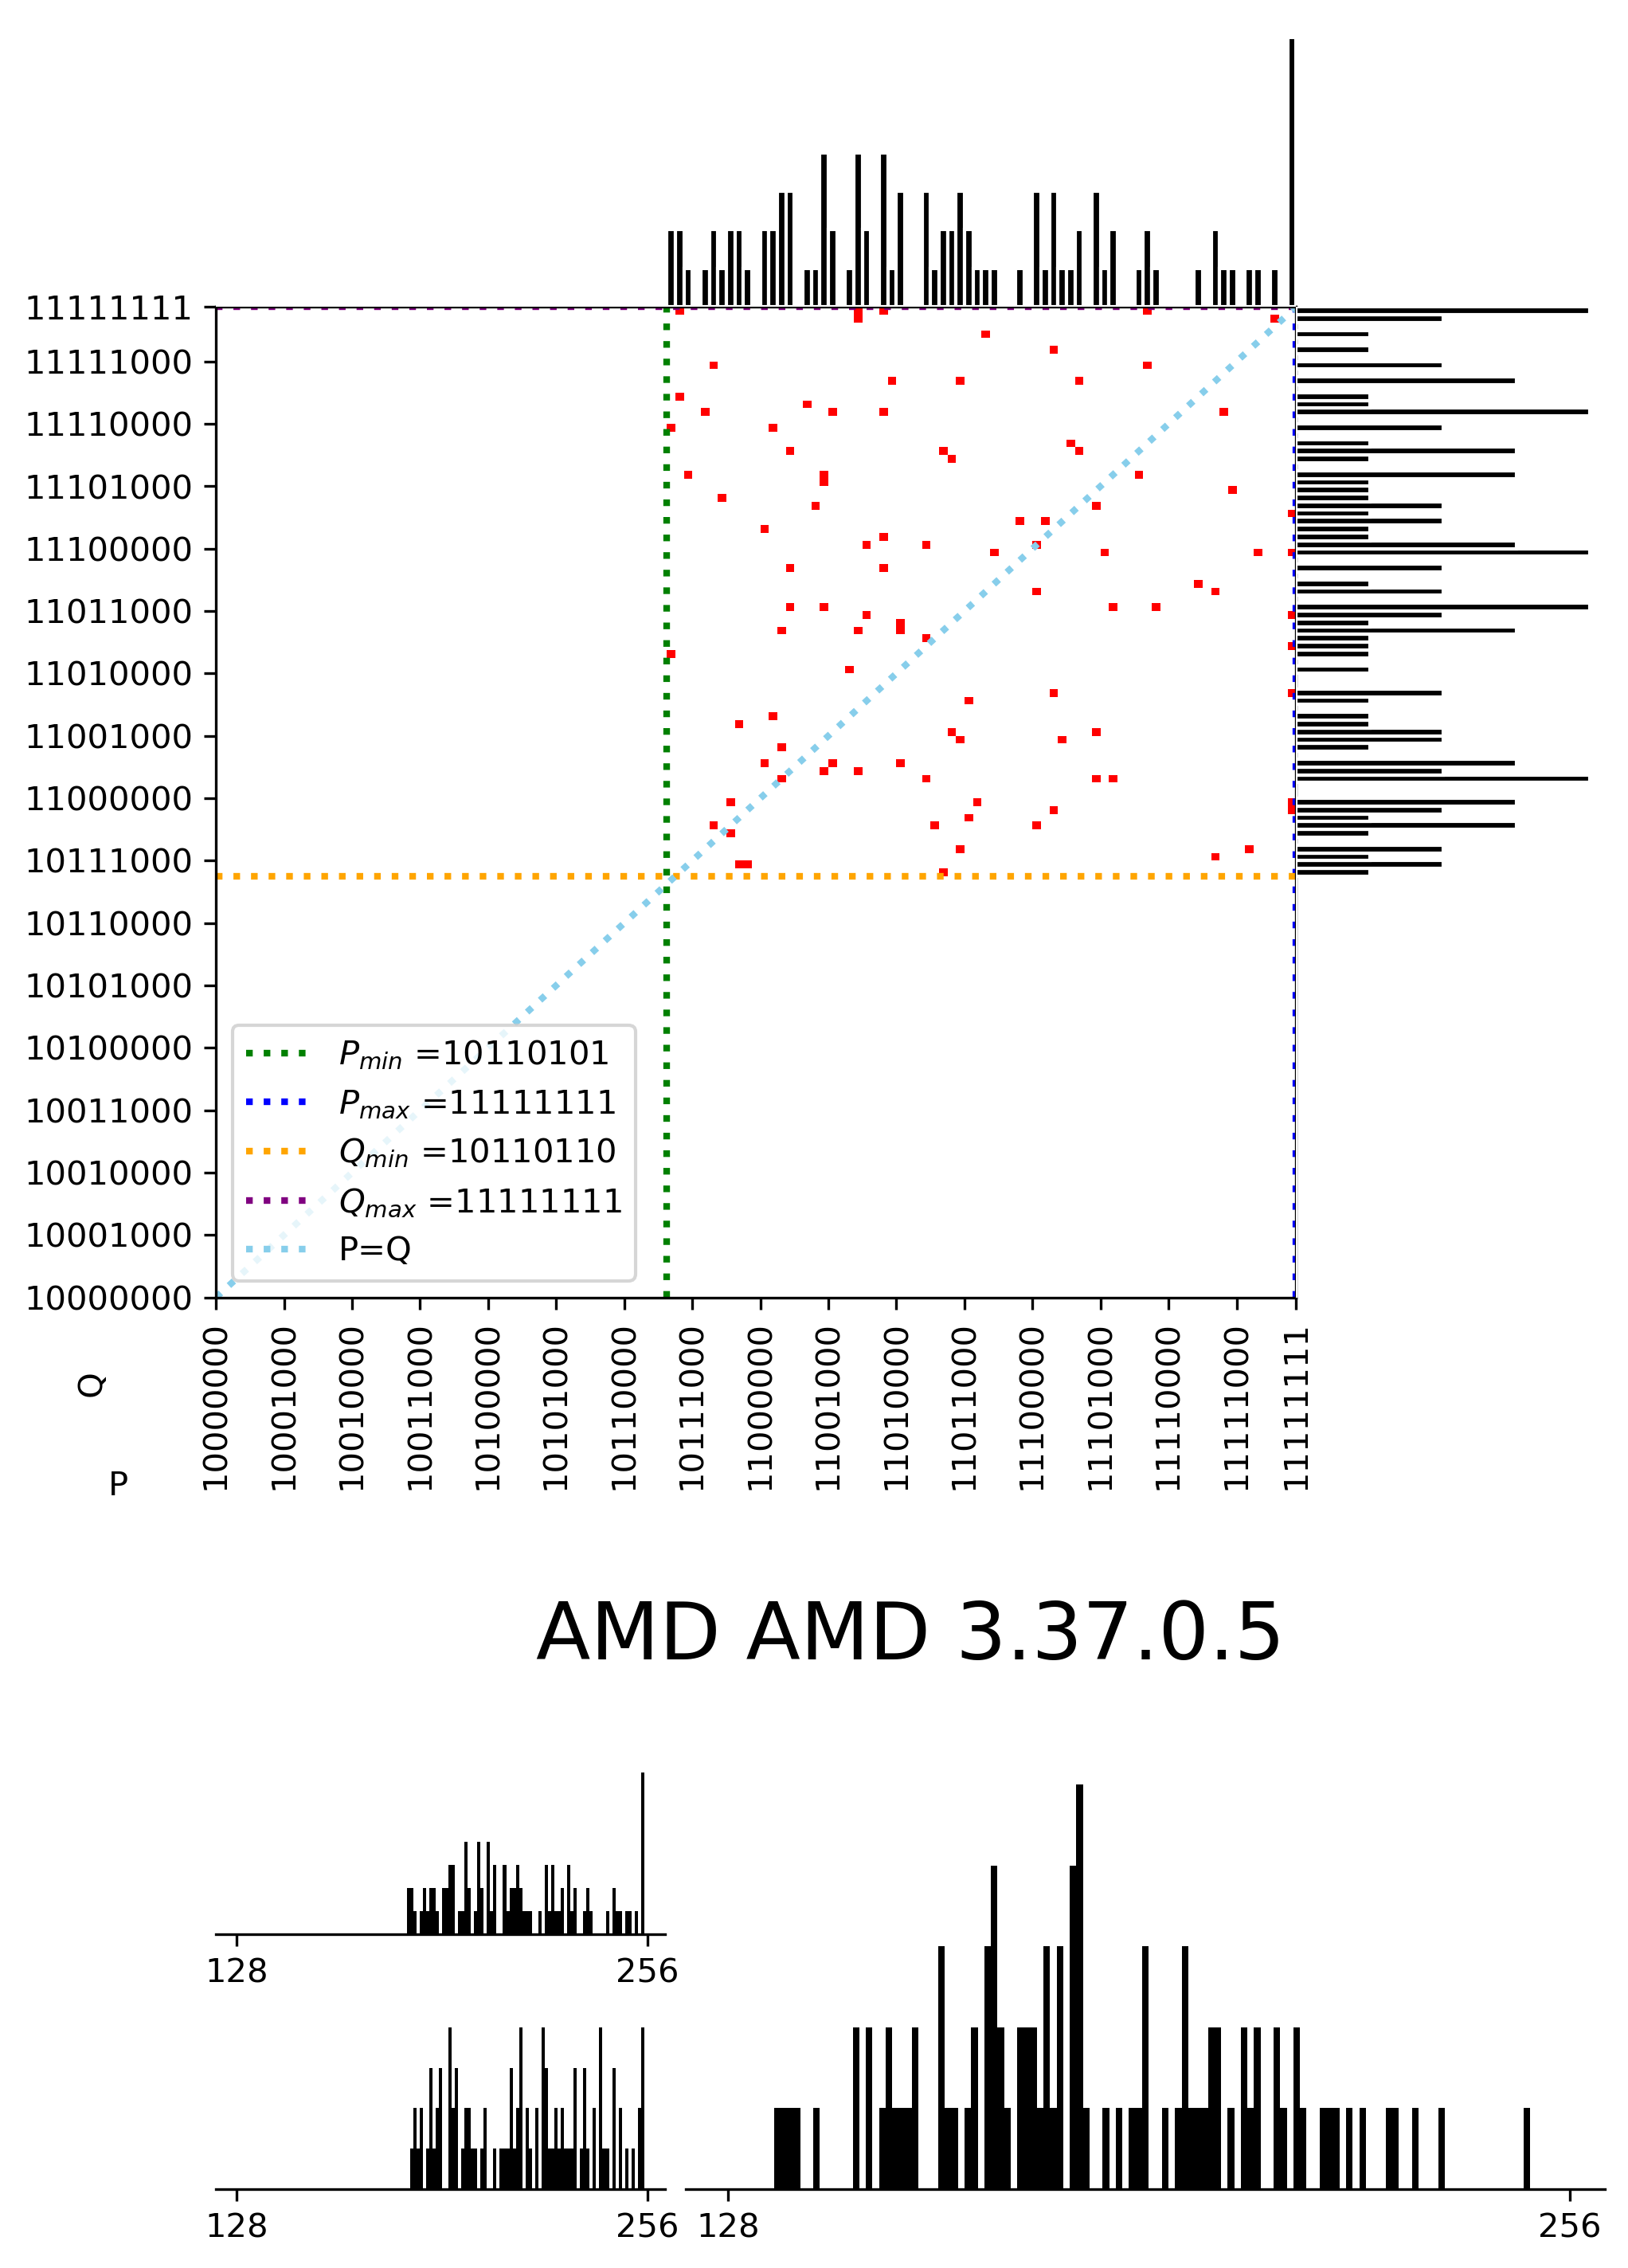

In [21]:
import matplotlib as mpl
from algtestprocess.modules.visualization.heatmap import Heatmap

mpl.rcParams['figure.dpi'] = 300

def choose_hist():

    names = [profile['device_name'] for profile in cryptoprops]
    
    which_device =  validInput("Please choose from these devices or write -1 to end", names)
    
    if which_device is None:
        return
    
    device = cryptoprops[which_device]
    
    rsa_choices = [key for key in device.keys() if 'rsa' in key.lower()]
    
    which_rsa = validInput("Please choose from these available RSA datasets or write -1 to end", rsa_choices)
    
    if which_rsa is None:
        return
    
    df = device[rsa_choices[which_rsa]]
    
    return Heatmap(df, device['device_name'])

chosen = choose_hist()
chosen.show()